# Exploring histogram binning

Let's use functions and lapply() calls to experiment with explicit binning for plotting histograms.

Histogram: determine how many examples in the dataset fall into each "bin"
   of a fixed size. This lets us look at the distribution of one variable 
   in the dataset at a time.
    
   A call to hist() computes the distribution and plots the result.

   - y axis shows the computed counts in a given "bin". 

   - The x axis values you supply must have numeric values. Otherwise you see errors like this:

        Error in hist.default(cr$Origin) : 'x' must be numeric

     To get numeric values, compute the contingency table first

   - You can use R defaults for bin size, or specify the "breaks" 
       parameter for a specific # bins.

   - hist() provides a default title, which you can override with main()


In [1]:
# load the Cars93 dataset
library(MASS)
cr = Cars93

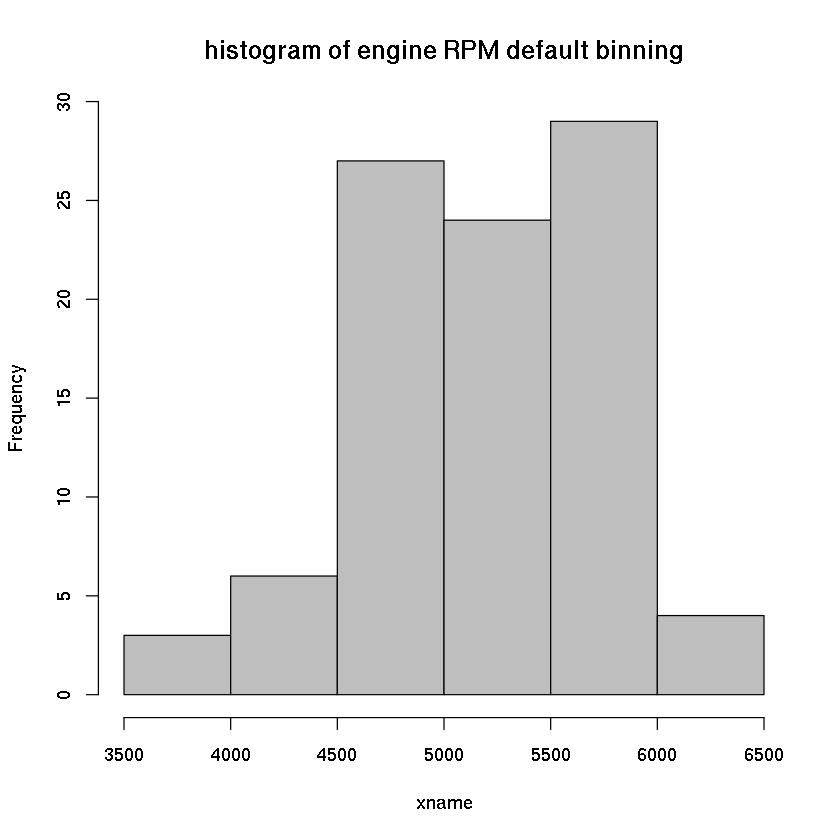

In [2]:
# ---- histograms and auto RPM data ----

# RPM for the Cars93 dataset (revs per minute at maximum horsepower).
xname="engine RPM"

# Use the default bin algorithm in this plot:
rpms = cr$RPM
hist(rpms, 
     xlab="xname", 
     main=paste("histogram of",xname,"default binning"),
     col="grey")



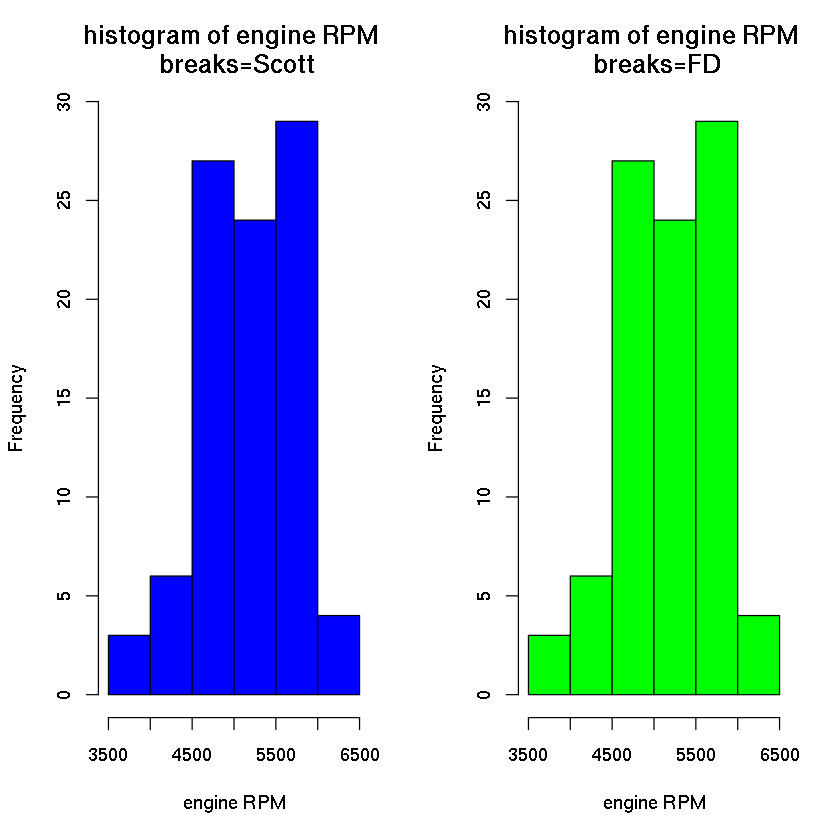

In [3]:
# R has named algorithms you can specify to perform binning. Here, Scott and FD algorithms come up with same answer!
par(mfrow=c(1,2))

hist(rpms, xlab=xname, main=paste("histogram of",xname, "\n breaks=Scott"), breaks="Scott", col="blue")
hist(rpms, xlab=xname, main=paste("histogram of",xname, "\n breaks=FD"), breaks="FD", col="green")

par(mfrow=c(1,1), pch=1)

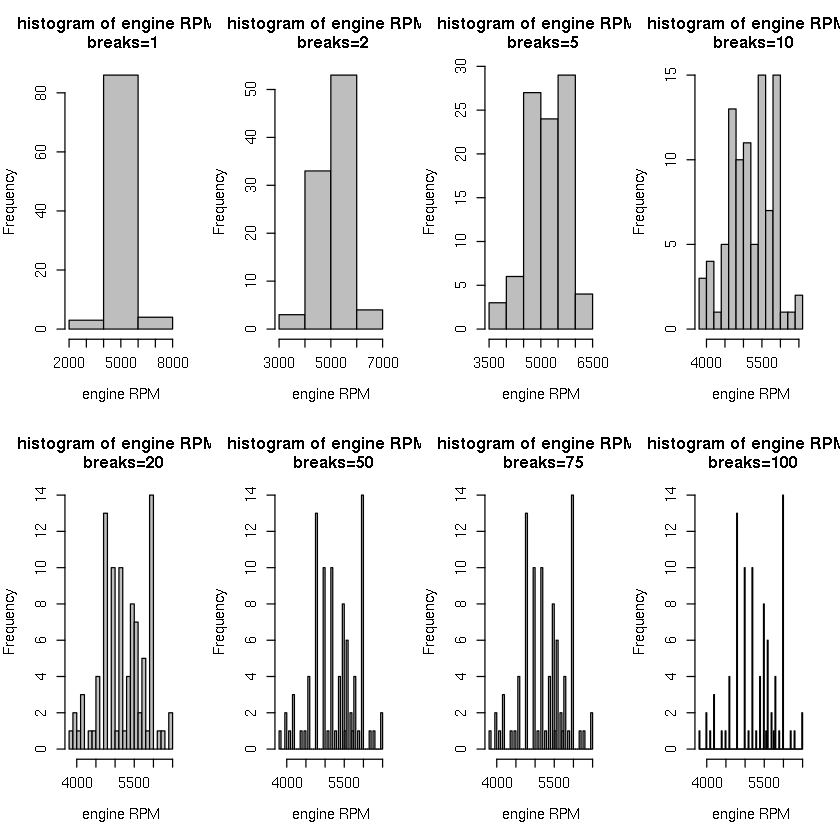

In [4]:
# ----------- Playing with histogram binning: -------------

# As the programmer you may suggest number of bins for the histogram. (R may disregard your request.)
# The "breaks" parameter supplies a suggested number of bins for the histogram, in this case:

par(mfrow=c(2,4))
hist(rpms, xlab=xname, main=paste("histogram of",xname, ",\n breaks=1"), breaks=1, col="grey")
hist(rpms, xlab=xname, main=paste("histogram of",xname, ",\n breaks=2"), breaks=2, col="grey")
hist(rpms, xlab=xname, main=paste("histogram of",xname, ",\n breaks=5"), breaks=5, col="grey")
hist(rpms, xlab=xname, main=paste("histogram of",xname, ",\n breaks=10"), breaks=10, col="grey")
hist(rpms, xlab=xname, main=paste("histogram of",xname, ",\n breaks=20"), breaks=20, col="grey")
hist(rpms, xlab=xname, main=paste("histogram of",xname, ",\n breaks=50"), breaks=50, col="grey")
hist(rpms, xlab=xname, main=paste("histogram of",xname, ",\n breaks=75"), breaks=75, col="grey")
hist(rpms, xlab=xname, main=paste("histogram of",xname, ",\n breaks=100"), breaks=100, col="grey")
par(mfrow=c(1,1), pch=1)


In [5]:
# how do we decide what bin count is most useful?

# --------------  experiment with bin count for Engine RPM: ----------------

# since it's boring to repeat the same line so many times, let's make a function do the work:

# accept a bin count for the breaks parameter. 
# plot a histogram of the Cars93$RPM variable, using the bin count specified

rpmHist <- function(bins) {
  hist(Cars93$RPM, 
       xlab=xname, 
       main=paste("histogram of engine RPM\n breaks=",bins), 
       col="blue",
       breaks=bins)
}

[[1]]
$breaks
[1] 2000 4000 6000 8000

$counts
[1]  3 86  4

$density
[1] 1.612903e-05 4.623656e-04 2.150538e-05

$mids
[1] 3000 5000 7000

$xname
[1] "Cars93$RPM"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

[[2]]
$breaks
[1] 3000 4000 5000 6000 7000

$counts
[1]  3 33 53  4

$density
[1] 3.225806e-05 3.548387e-04 5.698925e-04 4.301075e-05

$mids
[1] 3500 4500 5500 6500

$xname
[1] "Cars93$RPM"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

[[3]]
$breaks
[1] 3500 4000 4500 5000 5500 6000 6500

$counts
[1]  3  6 27 24 29  4

$density
[1] 6.451613e-05 1.290323e-04 5.806452e-04 5.161290e-04 6.236559e-04
[6] 8.602151e-05

$mids
[1] 3750 4250 4750 5250 5750 6250

$xname
[1] "Cars93$RPM"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

[[4]]
$breaks
 [1] 3800 4000 4200 4400 4600 4800 5000 5200 5400 5600 5800 6000 6200 6400 6600

$counts
 [1]  3  4  1  5 13 10 11  5 15  7 15  1  1  2

$density
 [1] 1.612903e-04 2.150538e-04 5.376344e-05 2.688172e-04 6.989247e-04
 [6] 5.3763

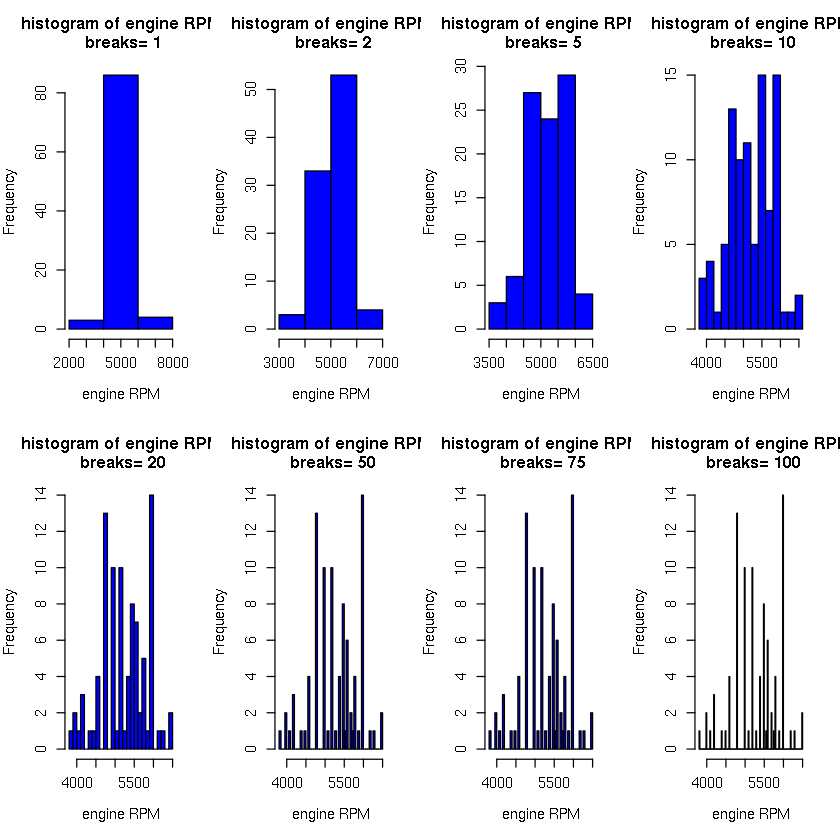

In [6]:
# create a vector of bin sizes to try:
binvec = c(1,2,5,10,20,50,75,100)

# make 2x4 = 8 plots on one page:
par(mfrow=c(2,4))

# now apply our function to 8 possible bin sizes, and plot each histogram:
lapply(binvec,rpmHist)

# set plots per page back to default:
par(mfrow=c(1,1), pch=1)


Which bin size seems most useful to you? Is more bins always better? How did the default binning algorithm perform, in your opinion?

## A more general bin size experiment

In [7]:
# Vary the bin sizes for an assortment of different columns in the Cars93 dataset.

# for purposes of locating best breaks for the cols specified below...
doHist <- function(bins, colnum) {
  hist(cr[,colnum], 
       col="grey",
       xlab=colnames(cr)[colnum], 
       main=paste("histogram of",colnames(cr)[colnum], "\n breaks=",bins), 
       breaks=bins)
}

# this function calls the doHist function for each value of binvec
tryBins <- function(colnum) {
  par(mfrow=c(2,4))
  binvec = c(8,10,12,15,18,20,25,50)
  # apply the doHist() function to the binvec vector and the column parameter:
  lapply(binvec, doHist, colnum)
  par(mfrow=c(1,1), pch=1)
}

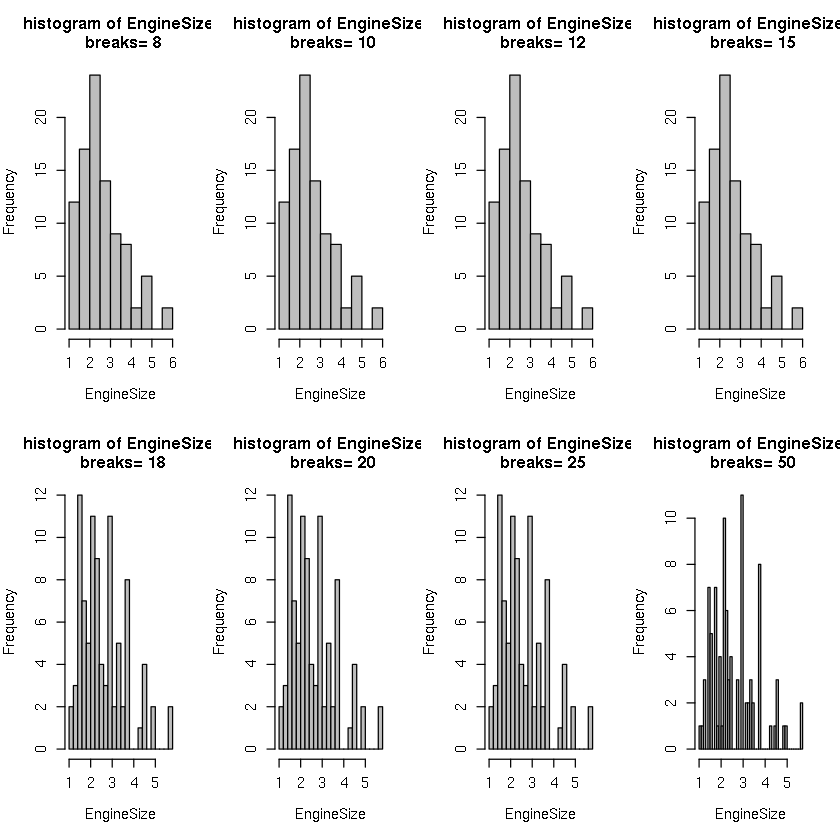

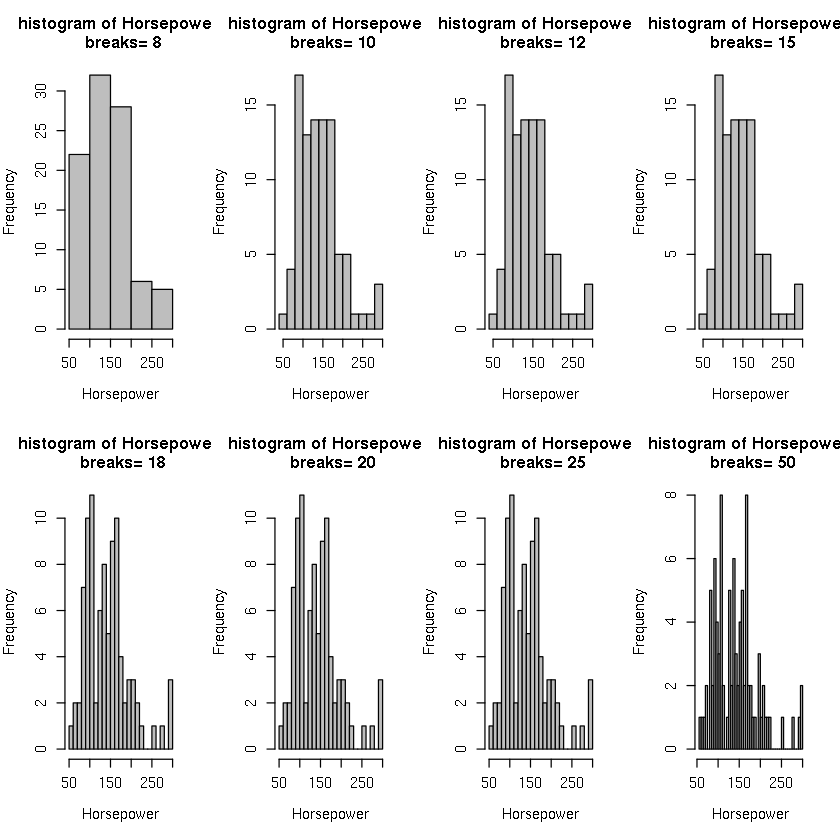

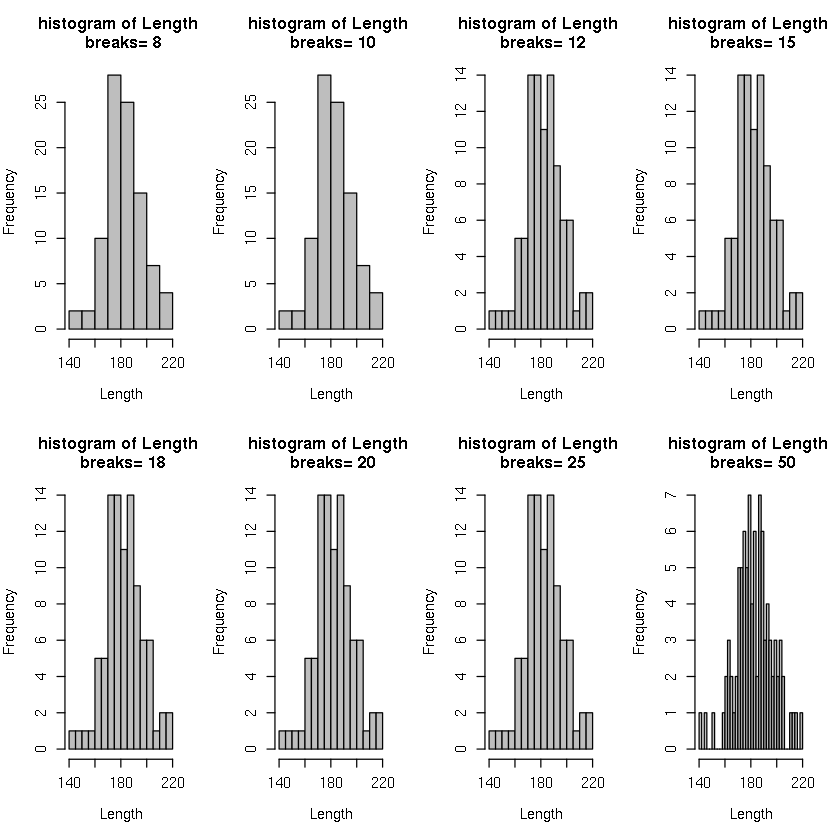

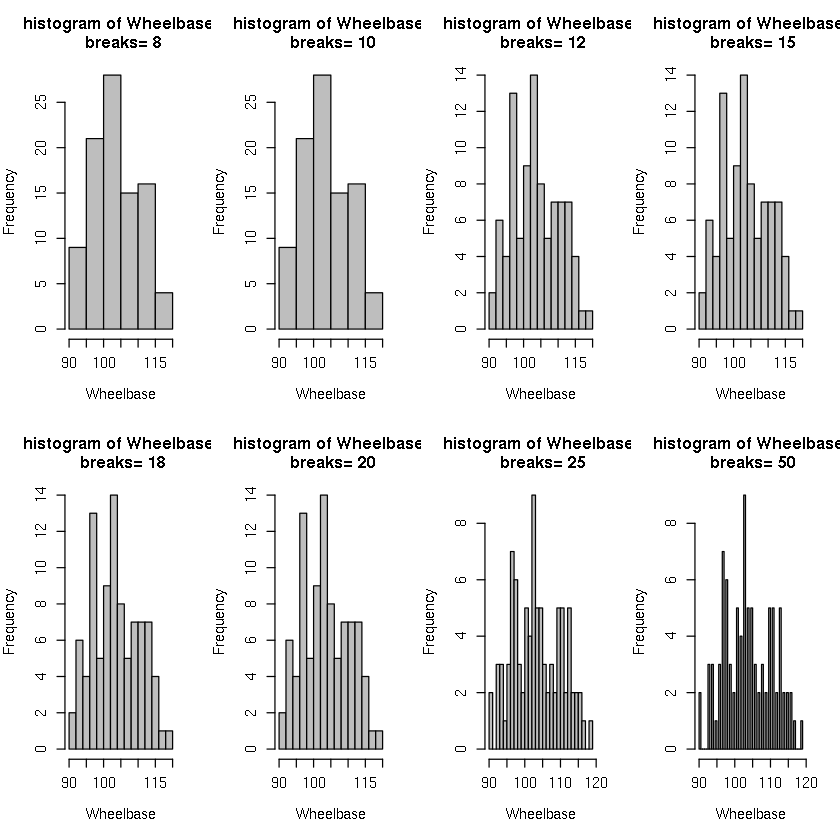

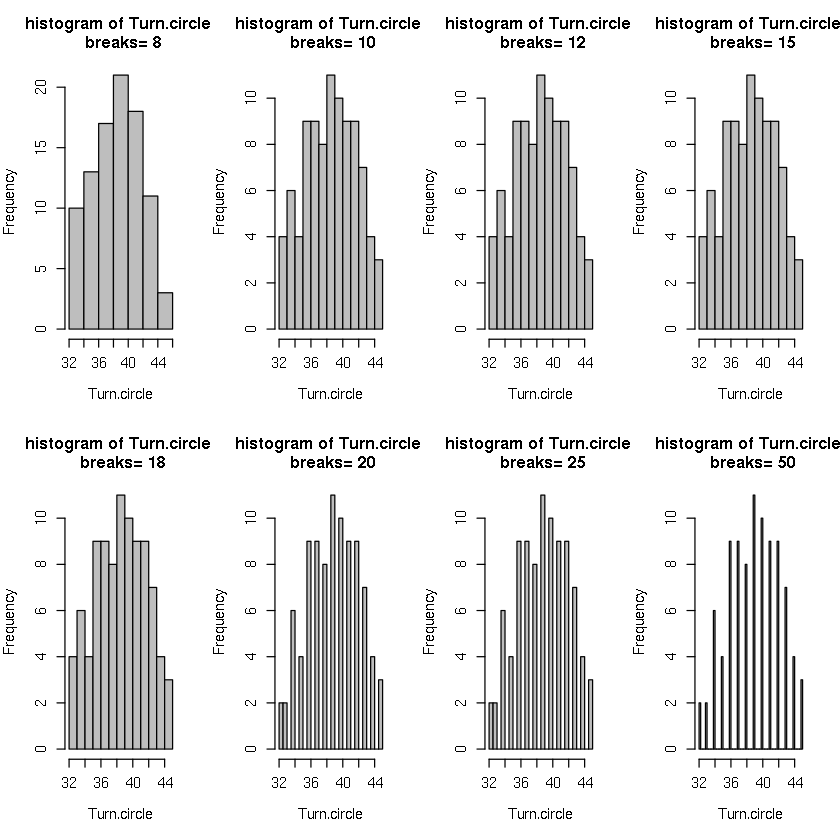

[[1]]
[[1]]$mfrow
[1] 2 4

[[1]]$pch
[1] 1


[[2]]
[[2]]$mfrow
[1] 2 4

[[2]]$pch
[1] 1


[[3]]
[[3]]$mfrow
[1] 2 4

[[3]]$pch
[1] 1


[[4]]
[[4]]$mfrow
[1] 2 4

[[4]]$pch
[1] 1


[[5]]
[[5]]$mfrow
[1] 2 4

[[5]]$pch
[1] 1


[[6]]
[[6]]$mfrow
[1] 2 4

[[6]]$pch
[1] 1

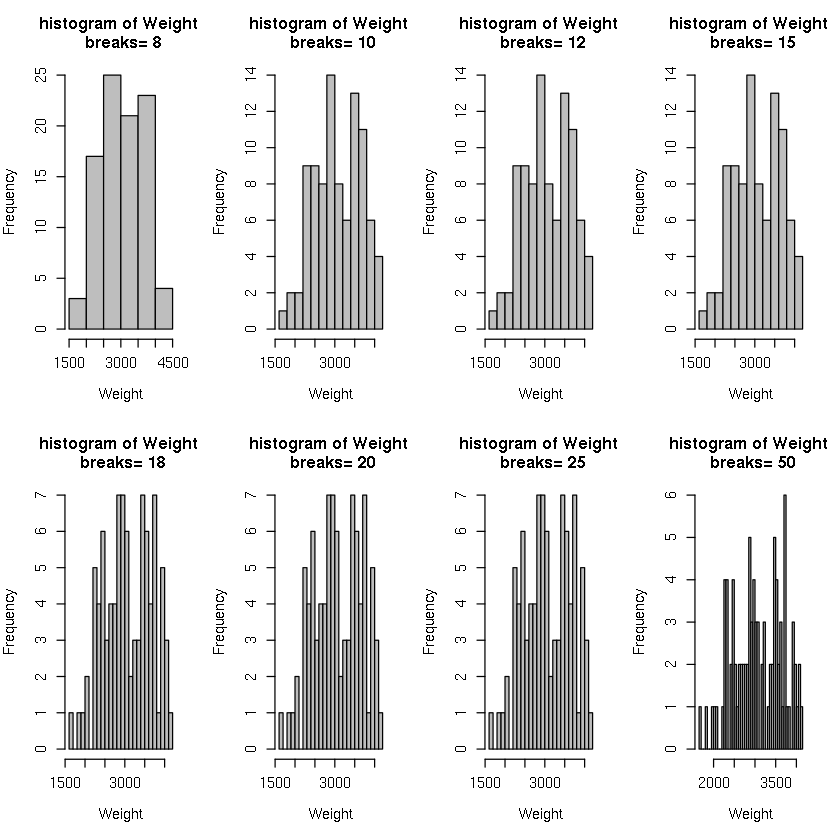

In [8]:
# The indices of some columns in Cars93:
hcols = c(12,13,19,20,22,25)

# Use lapply to call tryBins() on the hcols vector of columns:
lapply(hcols,tryBins)

# reset default plot settings: one plot per page, default point:
par(mfrow=c(1,1), pch=1)